In [2]:
import torch

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

import matplotlib.pyplot as plt

/Users/shrikantkendre/miniforge3/envs/tf2M1/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [3]:
train = datasets.MNIST('./data/', download=False, transform=torchvision.transforms.ToTensor(), train=True)
test = datasets.MNIST('./data/', download=False, transform=torchvision.transforms.ToTensor(), train=False)

In [4]:
train_loader = DataLoader(train, batch_size=16)
test_loader = DataLoader(test, batch_size=16)

In [5]:
train.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
train.data.shape

torch.Size([60000, 28, 28])

In [7]:
dataiter = iter(train_loader)
data, label = dataiter.next()

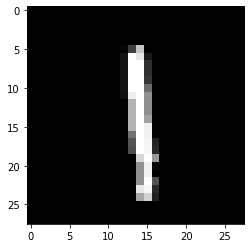

In [8]:
plt.imshow(data[8].numpy().squeeze(),cmap='gray')

In [9]:
class HandWritingNN(nn.Module):
    def __init__(self):
        super(HandWritingNN, self).__init__()
        self.cnn_layers = nn.Sequential(
            # params:
            # 1. #input channels
            # 2. # of filters (num of output channels)
            # Other stuff
            nn.Conv2d(1, 16, (3,3), (1,1), (1,1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, (3,3), (1,1), (1,1)),
            nn.ReLU(inplace=True),
            nn.MaxPool2d((2,2),(2,2))
            
        )
        self.linear_layers = nn.Sequential(nn.Linear(3136, 10))
        
    def forward(self,x ):
        output = self.cnn_layers(x)
        output = output.view(output.size(0), -1)
        output = self.linear_layers(output)
        return output

In [10]:
model = HandWritingNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [11]:
print(model)

HandWritingNN(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=3136, out_features=10, bias=True)
  )
)


In [12]:
epochs = 10
for epoch in range(epochs):
    total_loss = 0.
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f'At epoch {epoch} loss: {total_loss/len(train_loader)}')

At epoch 0 loss: 0.42795031761725744
At epoch 1 loss: 0.19474839743810396
At epoch 2 loss: 0.12942848117509856
At epoch 3 loss: 0.09516772580289592
At epoch 4 loss: 0.07670862846579403
At epoch 5 loss: 0.06571143755793261
At epoch 6 loss: 0.05845227564299324
At epoch 7 loss: 0.053203134669235444
At epoch 8 loss: 0.049084252134295334
At epoch 9 loss: 0.04565682024107082
